<a href="https://colab.research.google.com/github/Hirochon/ML-Iris-classification/blob/master/%E5%88%9D%E3%82%81%E3%81%A6%E3%81%AE%E3%82%A2%E3%83%A4%E3%83%A1%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learnでアヤメ分類しよう！

## 1．色々とインポートしていく。


*   Numpy
*   Pandas
*   matplot
*   warnings


In [0]:
## 鉄板ライブラリ
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2．scikit-learn内にある色々な機能をimportするよ!

In [0]:
## アヤメのデータセットをimport
from sklearn.datasets import load_iris
## 訓練用データとテスト用データを分けるプログラムをimport
from sklearn.model_selection import train_test_split
## 分類するアルゴリズム(線形SVM)をimport
from sklearn.svm import LinearSVC

## 3．アヤメのデータをじっくり見ていく



In [0]:
## アヤメデータのインスタンス生成
heacet = load_iris()

In [4]:
## アヤメのデータの中身を見ていく
print("与えられたデータ")
print(heacet.data)
print(heacet.data.shape)
print("-----------------")
print("予測するデータ")
print(heacet.target)
print(heacet.target.shape)
print(heacet.target_names)

与えられたデータ
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

## 4.Pandasを用いてデータを分かりやすくする！


In [0]:
heacet_data = pd.DataFrame(heacet.data, columns=["がく片の長さ","がく片の幅","花びらの長さ","花びらの幅"])
heacet_target = pd.DataFrame(heacet.target, columns=["花の種類"])
heacet_all = pd.concat([heacet_data,heacet_target], axis=1)

In [6]:
heacet_all.head(10)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
heacet_all.describe()

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 5.データセットをtrain_test_splitで分割する！

In [0]:
setsumei_train,setsumei_test,mokuteki_train,mokuteki_test = train_test_split(heacet_data, heacet_target, test_size=0.33)

In [9]:
setsumei_train.head(5)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
99,5.7,2.8,4.1,1.3
97,6.2,2.9,4.3,1.3
56,6.3,3.3,4.7,1.6
80,5.5,2.4,3.8,1.1
59,5.2,2.7,3.9,1.4


In [10]:
setsumei_train.describe()

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
count,100.000000,100.000000,100.000000,100.00000
mean,5.829000,3.065000,3.726000,1.19300
std,0.767167,0.436093,1.740174,0.75602
min,4.300000,2.000000,1.100000,0.10000
25%,5.175000,2.800000,1.600000,0.37500
50%,5.800000,3.000000,4.200000,1.30000
75%,6.400000,3.325000,5.100000,1.80000
max,7.700000,4.400000,6.900000,2.50000


In [11]:
mokuteki_train.head(5)

,花の種類
99,1
97,1
56,1
80,1
59,1


## 6.Matplotlibを使ってデータを可視化しよう！
### データの選択時に上下どちらの引数を使ってもOK
 * setsumei_train[mokuteki_train["花の種類"] == 0]["がく片の長さ"]
 * setsumei_train[(mokuteki_train == 0).values]["がく片の長さ"]
 
### 下のプログラムではどちらを使ってもOKということを示すために左右で使っています。

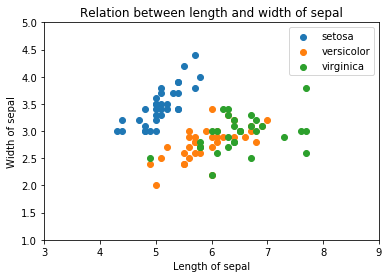

In [12]:
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==0]["がく片の長さ"],setsumei_train[(mokuteki_train == 0).values]["がく片の幅"],label="setosa",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==1]["がく片の長さ"],setsumei_train[(mokuteki_train == 1).values]["がく片の幅"],label="versicolor",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==2]["がく片の長さ"],setsumei_train[(mokuteki_train == 2).values]["がく片の幅"],label="virginica",cmap="rgb")

## X軸の範囲を指定
plt.xlim(3,9)
## Y軸の範囲を指定
plt.ylim(1,5)

## X軸の名前
plt.xlabel("Length of sepal")
## Y軸の名前
plt.ylabel("Width of sepal")

## グラフのタイトル
plt.title("Relation between length and width of sepal")
## 凡例を出力
plt.legend()

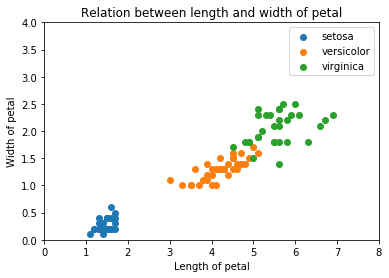

In [13]:
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==0]["花びらの長さ"],setsumei_train[(mokuteki_train == 0).values]["花びらの幅"],label="setosa",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==1]["花びらの長さ"],setsumei_train[(mokuteki_train == 1).values]["花びらの幅"],label="versicolor",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==2]["花びらの長さ"],setsumei_train[(mokuteki_train == 2).values]["花びらの幅"],label="virginica",cmap="rgb")

plt.xlim(0,8)
plt.ylim(0,4)

plt.xlabel("Length of petal")
plt.ylabel("Width of petal")

plt.title("Relation between length and width of petal")
plt.legend()

## 7.機械学習アルゴリズムを使っていこう！
* 使うのは線形SVM(LinearSVC)
### 特徴量として以下の２つの組み合わせを使う！
  * ["がく片の長さ"]と["がく片の幅"]のがく片コンビ
  * ["花びらの長さ"]と["花びらの幅"]の花びらコンビ



In [0]:
## がく片コンビのDataFrameを作成する。
gakuhen_train = setsumei_train.loc[:,["がく片の長さ","がく片の幅"]]

## 花びらコンビのDataFrameを作成する。
hanabira_train = setsumei_train.loc[:,["花びらの長さ","花びらの幅"]]


In [0]:
## それぞれモデルを構築
gakuhen_model = LinearSVC()
hanabira_model = LinearSVC()

## それぞれのモデルに学習させる
gakuhen_model.fit(gakuhen_train,mokuteki_train)
hanabira_model.fit(hanabira_train,mokuteki_train)

## それぞれのモデルで予測させて、予測値を代入させる
gakuhen_predict = gakuhen_model.predict(setsumei_test.loc[:,["がく片の長さ","がく片の幅"]])
hanabira_predict = hanabira_model.predict(setsumei_test.loc[:,["花びらの長さ","花びらの幅"]])

In [16]:
## sklearnライブラリからscore算出の関数をimport
from sklearn.metrics import accuracy_score

## gakuhen_scoreとhanabira_scoreにそれぞれに結果を代入
gakuhen_score = accuracy_score(mokuteki_test, gakuhen_predict)
hanabira_score = accuracy_score(mokuteki_test, hanabira_predict)

print('がく片の長さと幅コンビの正解率：{}'.format(gakuhen_score),'花びらの長さと幅コンビの正解率：{}'.format(hanabira_score), sep='\n')

がく片の長さと幅コンビの正解率：0.74
花びらの長さと幅コンビの正解率：0.92


In [0]:
def heacet_border_check(H, M, model, param1, param2, resolution=0.01):
    H1_min, H1_max = H[param1].min()-0.5, H[param1].max()+0.5
    H2_min, H2_max = H[param2].min()-0.5, H[param2].max()+0.5
    H1, H2 = np.meshgrid(np.arange(H1_min, H1_max, resolution),
                           np.arange(H2_min, H2_max, resolution))
    n = np.array([H1.ravel(), H2.ravel()]).T
    Z = model.predict(n)
    Z = Z.reshape(H1.shape)
    plt.contourf(H1, H2, Z, alpha=0.5, cmap="Set2")
    plt.xlim(H1_min, H1_max)
    plt.ylim(H2_min, H2_max)
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.scatter(H[param1],H[param2], c=M["花の種類"], cmap="brg")

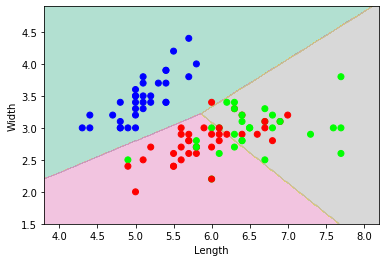

In [18]:
heacet_border_check(setsumei_train, mokuteki_train, gakuhen_model, "がく片の長さ", "がく片の幅")

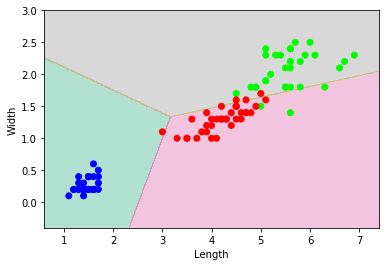

In [19]:
heacet_border_check(setsumei_train, mokuteki_train, hanabira_model, "花びらの長さ", "花びらの幅")